**<center> ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ</center>**
**<center>ГОРОДА МОСКВЫ</center>**
**<center>ДОПОЛНИТЕЛЬНОГО ПРОФЕССИОНАЛЬНОГО ОБРАЗОВАНИЯ</center>**
**<center>ЦЕНТР ПРОФЕССИОНАЛЬНЫХ КВАЛИФИКАЦИЙ И СОДЕЙСТВИЯ ТРУДОУСТРОЙСТВУ</center>**
**<center>«ПРОФЕССИОНАЛ»</center>**
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### <center> ИТОГОВАЯ АТТЕСТАЦИОННАЯ РАБОТА </center>
<center> на тему </center>
<center> «Анализ данных с использованием Python» </center>
<center> (на примере анализа данных исследуемого продукта) </center> 
<center>слушателя Бобрешова Алексея Владимировича<br>группы № 859 </center>
 <center>по программе профессиональной переподготовки </center>
<center> «Аналитик данных» </center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### <center> Москва, 2022

### Цель исследования:

# Предсказание возврата по кредиту

Многие люди берут кредит в банке. Некоторые не отдают. Когда просрочка платежей превышает 90 дней, считается что, по данному кредиту произошел дефолт, то есть клиент не в состоянии его исполнить.

Одна из первых задач, которую решало машинное обучение в банках, - предсказание дефолта.
Нужно по данным, которые предоставил потенциальный заемщик, определить, будет у него дефолт или нет.


### Задача предсказания дефолта - задача классификации, а результат работы модели для конкретного клиента - предсказать насколько велика вероятность дефолта у данного клиента.

Пункты выполнения задачи:<br>
<a href=#0>1.  Загрузка данных и библиотек для обработки</a><br>
<a href=#1>2.  Визуальный осмотр данных</a><br>
<a href=#2>3.  Исследовательский анализ данных</a><br>
<a href=#3>4.  Составление портрета клиента.</a><br>
<a href=#4>5.  Исследование статистических показателей.</a><br>
<a href=#5>6.  Использование моделей машинного обучения.</a><br>
<a href=#6>7.  Выводы</a><br>

### Цель этого проекта — выявить идеальный портрет заёмщика. 

#### Столбцы данных

Данные содержат два типа переменных:

* Целевая: **SeriousDlqin2yrs**, есть ли просрочка 90 дней и более
* Остальные переменные: 10 переменных, могут использоваться для прогноза целевой переменной.

| Имя столбца        | Значение |
| :-------------: |:-------------:|
| SeriousDlqin2yrs      | **Целевая переменная:** Есть ли просрочка 90 дней и более |
| RevolvingUtilizationOfUnsecuredLines      | Доля использованных лимитов по кредитным картам     |
| age | Возраст заемщика в годах |
| DebtRatio | Отношение суммы долговой нагрузки, расходов на жизнь и алименты к доходу |
| MonthlyIncome | Доход в месяц |
| NumberOfOpenCreditLinesAndLoans | Количество открытых кредитов и кредитных линий (кредитных карт) |
| NumberRealEstateLoansOrLines | Количество ипотек и других кредитных продуктов, связанных с недвижимостью |
| NumberOfTime30-59DaysPastDueNotWorse | Сколько раз за последние 2 года у заемщика была просрочка 30-59 дней |
| NumberOfTime60-89DaysPastDueNotWorse | Сколько раз за последние 2 года у заемщика была просрочка 60-89 дней |
| NumberOfTimes90DaysLate | Сколько раз за последние 2 года у заемщика была просрочка более 90 дней |
| NumberOfDependents | Количество иждивенцев в семье (супруг, дети и т.п.) |
	

#  <a name="0">1.  Загрузка данных и библиотек для обработки</a>

Для работы с данными требуется специальная библиотека **pandas**, программную библиотеку на языке python для обработки и анализа данных.

In [ ]:
import pandas as pd 

Для работы с графиками специальную библиотеку **matplotlib**, программную библиотеку на языке python для визуализации данных двумерной и трехмерной графикой.

In [ ]:
import matplotlib.pyplot as plt

Для работы с массивами чисел модуль **Numpy**

In [ ]:
import numpy as np

Библиотека `scikit-learn` - наиболее популярный, хорошо документированный и постоянно обогащающийся инструмент для построения моделей машинного обучения.

Выберем из него:
* классификатор дерево решений (**DecisionTreeClassifier**);
* метод для удобной $k*-$fold* кросс-валидации (**KFold**);
* несколько готовых функции для расчёта метрик качества классификации.

In [ ]:
from sklearn.tree import DecisionTreeClassifier                    # классификатор дерева решений
from sklearn.model_selection import KFold                          # k-fold кросс-валидация
from sklearn.metrics import roc_curve, precision_recall_curve, auc # метрики качества
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score # метрики качества
from sklearn.metrics import average_precision_score                # метрики качества

Визуализация полезна как для предварительного анализа, так и для исследования метрик качества, а также упрощает принятие решений и обобщение результатов.

Библиотека **MatplotLib**, отлично справляется с этой задачей.
Модуль **seaborn** устанавливет "приятные для глаз" палитры и стили для графиков.

In [ ]:
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid') 
# установить стиль whitegrid, другие стили можно найти в документации к seaborn

# импорт библиотеки warnings для отключения предупреждений 
# которые важно учитывать в "боевых" задачах.
import warnings  
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Загрузка данных из среды браузера Jupiter Notebook с удаленного репозитория (облака)


In [ ]:
%%capture
!wget https://www.dropbox.com/s/io67uppgq66plbp/training_data.csv
!wget https://www.dropbox.com/s/2ga9maqxbsf8xhg/test_data.csv

#### Загрузка данных из среды VS Code из локального репозитория


In [ ]:
way_train = 'base/training_data.csv'  # путь к тренировоной БД
way_tests = 'base/test_data.csv'      # путь к тестовой БД

In [ ]:
# Загрузка в память с библиотекой PANDAS :

base_train = pd.read_csv(way_train) # в переменную base_train
base_tests = pd.read_csv(way_tests) # в переменную base_tests


#  <a name="1">2.Визуальный осмотр полученных данных</a>

Начнем с вывода данных из полученых таблиц


In [ ]:
# из тренировочной базы выводим значения с 50-го по 250-ое с шагом 50

base_train[50:251:50]


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
50,0,0.075662,63,0,0.315813,6848.0,7,0,2,0,0.0
100,0,0.303279,31,1,0.081306,3000.0,6,0,0,0,0.0
150,0,0.052372,56,0,0.011134,7184.0,2,0,0,0,0.0
200,0,0.015324,44,0,0.208842,18750.0,9,0,3,0,2.0
250,0,0.135172,60,0,0.021734,8465.0,6,0,0,0,0.0


In [ ]:
# из тестовой выводим 5 случайных значений 

base_tests.sample(5, random_state=10)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
995,0,0.626574,35,0,0.580384,6667.0,8,0,3,0,2.0
20742,0,1.000000,67,0,892.000000,NaN,4,0,1,0,NaN
13175,0,0.626522,56,1,0.310957,5749.0,10,0,1,0,0.0
12785,0,0.518864,34,0,0.304580,15000.0,13,0,2,0,0.0
8639,0,0.400575,32,0,0.305551,6250.0,3,0,1,0,3.0


### Далее проверка общей информации о данных.
применим к переменной **base_train** метод `.info()`.

In [ ]:
base_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      50000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  50000 non-null  float64
 2   age                                   50000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  50000 non-null  int64  
 4   DebtRatio                             50000 non-null  float64
 5   MonthlyIncome                         40147 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       50000 non-null  int64  
 7   NumberOfTimes90DaysLate               50000 non-null  int64  
 8   NumberRealEstateLoansOrLines          50000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  50000 non-null  int64  
 10  NumberOfDependents                    48667 non-null  float64
dtypes: float64(4), 

#### Выводим размеры полученных баз
Количество строк и столбцов значений получаем методом `.shape`

In [ ]:
print (
  'Размер тренировочной базы {}\nРазмер тестовой базы {}'.format
    (base_train.shape, base_tests.shape)
) 

Размер тренировочной базы (50000, 11)
Размер тестовой базы (37500, 11)


#  <a name="2"> 3. Исследовательский анализ данных</a>


### *Посмотрим общую статистику по данным*

Технические параметры загруженных данных для обучения вызовем метод `.describe()` 

A для удобства чтения: 
- транспонируем результат `.T`- меняем местами столбцы и строки 
- и ещё округлим до двух десятых `.round(2)`.

In [ ]:

base_train.describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,50000.0,0.07,0.25,0.0,0.00,0.00,0.00,1.0
RevolvingUtilizationOfUnsecuredLines,50000.0,7.93,332.39,0.0,0.03,0.15,0.56,50708.0
age,50000.0,52.24,14.77,21.0,41.00,52.00,63.00,109.0
NumberOfTime30-59DaysPastDueNotWorse,50000.0,0.43,4.27,0.0,0.00,0.00,0.00,98.0
DebtRatio,50000.0,352.44,2006.43,0.0,0.18,0.37,0.86,329664.0
MonthlyIncome,40147.0,6642.23,18122.71,0.0,3400.00,5400.00,8250.00,3008750.0
NumberOfOpenCreditLinesAndLoans,50000.0,8.48,5.17,0.0,5.00,8.00,11.00,57.0
NumberOfTimes90DaysLate,50000.0,0.27,4.24,0.0,0.00,0.00,0.00,98.0
NumberRealEstateLoansOrLines,50000.0,1.02,1.12,0.0,0.00,1.00,2.00,32.0
NumberOfTime60-89DaysPastDueNotWorse,50000.0,0.25,4.23,0.0,0.00,0.00,0.00,98.0


Из увиденного мы уже можем извлечь некоторую информацию о данных:
* У столбца **SeriousDlqin2yrs** среднее 0.07. Значит, в нашей выборке только у 7% клиентов есть дефолт.
* У столбца **MonthlyIncome** заполнено только 40'147 значений из 50'000. Минимальное значение дохода - 0, максимальное - 3'008'750.
* У столбца **NumberOfDependents** больше половины значений - нулевые.

#  <a name="3">4. Портрет (срезы) данных</a>

Рассчитаем средние значения признаков в обучающей выборке, и заполним полученными
числами пропуски как в **тестовом наборе** данных, так и в **самой обучающей выборке**.

Для получения средних значений вызовем метод `.mean()`. По умолчанию метод считает средним значения по столбцам. После выполнения ячейки средние значения записаны в переменной **train_mean**

In [ ]:
train_mean = base_train.mean() # получаем средние значения и передаем их переменной
train_mean                     # выводим полученние значения


SeriousDlqin2yrs                           0.066860
RevolvingUtilizationOfUnsecuredLines       7.927880
age                                       52.240520
NumberOfTime30-59DaysPastDueNotWorse       0.428220
DebtRatio                                352.441921
MonthlyIncome                           6642.232222
NumberOfOpenCreditLinesAndLoans            8.476040
NumberOfTimes90DaysLate                    0.269920
NumberRealEstateLoansOrLines               1.017500
NumberOfTime60-89DaysPastDueNotWorse       0.246040
NumberOfDependents                         0.756180
dtype: float64

данные схожи со значениями полученными ранее в сводной таблице, методом `.describe()` колонки **mean**, разница лишь в том что сейчас денные не округлены.

Пропуски в данных можно заполнять и разными методами:
* выборочной статистикой (среднее, медиана);
* прогнозами регрессии по известыми признакам;
* случайными значениями.

Если относительно небольшая доля наблюдению имеет пропуски, то можно
вовсе исключить неполные наблюдения с пропущенными значениями из выборки.

Для заполнения средним значеним, передадим на вход методу `.fillna` полученный ранее набор средних значений для каждого столбца. Опция `inplace=True` говорит, что мы запишем изменения прямо в существующий массив, а не создадим новый.

In [ ]:
base_train = base_train.fillna(train_mean)
base_train.fillna(train_mean, inplace=True)

In [ ]:
base_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      50000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  50000 non-null  float64
 2   age                                   50000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  50000 non-null  int64  
 4   DebtRatio                             50000 non-null  float64
 5   MonthlyIncome                         50000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       50000 non-null  int64  
 7   NumberOfTimes90DaysLate               50000 non-null  int64  
 8   NumberRealEstateLoansOrLines          50000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  50000 non-null  int64  
 10  NumberOfDependents                    50000 non-null  float64
dtypes: float64(4), 

Были значения колонок: 
- **MonthlyIncome = 40147** стали **50000**
- **NumberOfDependents = 48667** стали **50000**

#  <a name="4"> 5. Исследование статистических показателей.</a>

Целевой признак **SeriousDlqin2yrs** - наличие серьёзной просрочки по кредитным выплатам за последние два года.

Чтобы посчитать количество хороших заемщиков 
- (значение переменной **SeriousDlqin2yrs** == 0) и плохих с просрочкой 
- (значение **SeriousDlqin2yrs** == 1) используем метод `value_counts()`

In [ ]:
# Можно несколькими способами получить данные из колонки (столбца)
target_variable_name = 'SeriousDlqin2yrs'
base_train[target_variable_name].value_counts() # через переменную указанную выше
base_train['SeriousDlqin2yrs'].value_counts()   # явным указанием колонки
base_train.SeriousDlqin2yrs.value_counts()      # выбором через dot '.' точку


0    46657
1     3343
Name: SeriousDlqin2yrs, dtype: int64

в отдельную переменную *training_values* столбец из нашей таблицы, который соответствует определенной выше целевой переменной

In [ ]:

training_values = base_train.SeriousDlqin2yrs
training_values[35555:35561] # смотрим значения ячеек с 35555 по 35560


35555    0
35556    0
35557    0
35558    0
35559    0
35560    0
Name: SeriousDlqin2yrs, dtype: int64

Отделим входные переменные от выходной (целевой), чтобы можно было построить модель предсказания целевой переменной по входным. Для это нужно у переменной **training_data** вызвать метод `.drop()`.

In [ ]:

training_points = base_train.drop(target_variable_name, axis=1)


In [ ]:
print (
    'Первоначальный размер БД {} и {} - с удаленной целевой колонкой'
    .format(base_train.shape, training_points.shape)
)

Первоначальный размер БД (50000, 11) и (50000, 10) - с удаленной целевой колонкой


#  <a name="5">6. Использование моделей машинного обучения</a>

Воспользуемся двумя методами для построения моделей классификации и сравним их между собой:
* Логистическая регрессия *logistic regression*
* Лес решающих деревьев *random forest*

Логистическая регрессия - "адаптация" линейной регрессии для решения задачи классификации. Она принадлежит к классу обобщенных линейных моделей.
А вот с помощью леса решающих деревьев можно хорошо решать и задачу регрессии, и задачу классификации.

Импортируем два модуля из этой библиотеки:
 * *linear_model* - тут находятся все линейные *и обобщенные линейные* модели, в том числе модель логистической регрессии.
 * *ensemble* - тут находятся модели на основе ансамблей.

In [ ]:
from sklearn import linear_model, ensemble

#### Чтобы создать модель логистической регресии, 
пишем имя модуля `linear_model`, затем точку, затем название модели.

Для этого нужно выполнить следующий код:

```python
log_regres_model = linear_model.logistic_regression_model()
```

Модель логистической регрессии сложнее, чем модель линейной регрессии. Поэтому параметров у такой модели гораздо больше. Многие из них связаны с тем, с помощью какой процедуры мы будем подбирать параметры модели (*max_iter*, *dual*, *solver*, *tol*, *warm_start*), устойчивостью модели (*C*, *penalty*), тем, что мы решаем задачу классификации, а не регрессии (*class_weight*, *multi_class*)



In [ ]:
log_regres_model = linear_model.LogisticRegression() # создаем модель

In [ ]:
log_regres_model

LogisticRegression()

#### Чтобы создать модель случайного леса, 
пишем имя модуля `ensemble`, затем точку, затем название модели. 
Для этого нужно выполнить следующий код:

```python
rand_forest_model = ensemble.RandomForestClassifier()
```

Код отличается от кода при решении задачи регрессии тем, что теперь нам нужна модель для классификации `RandomForestClassifier`, а не регрессии `RandomForestRegressor`.

In [ ]:
rand_forest_model = ensemble.RandomForestClassifier() #создаем модель

In [ ]:
rand_forest_model

RandomForestClassifier()

У модели классификации на основе случайного леса много параметров. Рассмотрим наиболее важные:
* параметр *n_estimators* определяет, сколько деревьев в лесу,
* в параметре *max_depth* устанавливается, какая максимальная глубина у дерева,
* в параметре *min_samples_leaf* задается, какое максимальное число объектов может попасть в лист дерева.

## *Обучить модель*

Теперь, когда мы создали прототипы обеих моделей, можем их обучить с помощью обучающей выборки. 

Для этого вызываем метод `.fit()` у каждой модели и передаем ему на вход два аргумента: 
таблицу входных признаков и столбец значений целевой переменной 
- (**training_points**, **training_values**)

In [ ]:
# обучаем модель логистическая регрессия
log_regres_model.fit(training_points, training_values)

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# обучаем модель случайный лес
rand_forest_model.fit(training_points, training_values)

RandomForestClassifier()

## *Проверить на тестовой выборке*


In [ ]:
base_tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      37500 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  37500 non-null  float64
 2   age                                   37500 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  37500 non-null  int64  
 4   DebtRatio                             37500 non-null  float64
 5   MonthlyIncome                         30044 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       37500 non-null  int64  
 7   NumberOfTimes90DaysLate               37500 non-null  int64  
 8   NumberRealEstateLoansOrLines          37500 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  37500 non-null  int64  
 10  NumberOfDependents                    36521 non-null  float64
dtypes: float64(4), 

Тестовые данные **base_tests** нужно предобработать аналогично обучающим. Поэтому заполним сперва пропуски в данных.

Для заполнения средним значеним, передадим на вход методу `fillna` полученный ранее набор средних значений для каждого столбца. Опция `inplace=True` говорит, что мы запишем изменения прямо в существующий массив, а не создадим новый

In [ ]:

base_tests.fillna(train_mean, inplace=True)


#### *Посмотрим что получилось*

In [ ]:
base_tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      37500 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  37500 non-null  float64
 2   age                                   37500 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  37500 non-null  int64  
 4   DebtRatio                             37500 non-null  float64
 5   MonthlyIncome                         37500 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       37500 non-null  int64  
 7   NumberOfTimes90DaysLate               37500 non-null  int64  
 8   NumberRealEstateLoansOrLines          37500 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  37500 non-null  int64  
 10  NumberOfDependents                    37500 non-null  float64
dtypes: float64(4), 

### *Аналогично тренировочным данным, отделим "целевую переменную" разбив данные на **values** и **points***

In [ ]:
test_values = base_tests.SeriousDlqin2yrs
test_points = base_tests.drop(target_variable_name, axis=1)

In [ ]:
print (
    'Первоначальный размер БД {} и {} - с удаленной целевой колонкой'
    .format(base_tests.shape, test_points.shape)
)
# Целевую колонку должна предсказать обученная модель

Первоначальный размер БД (37500, 11) и (37500, 10) - с удаленной целевой колонкой


## Валидация моделей

Получим прогноз модели на тестовых данных *`test_points`* с помощью моделей логистической регрессии и решающего леса.
Для этого для обеих моделей запустим метод **`predict()`**.

In [ ]:
# модель логистической регрессии
test_predict_log_regression = log_regres_model.predict(test_points)

In [ ]:
# модель случайный лес (лес принимающих решений)
test_predict_rand_forest = rand_forest_model.predict(test_points)

Что бы посмотреть, сколько предсказаний каждого вида (дефолтов и возвратов кредитов) спрогнозировали модели, необходимо вызвать функцию **`.value_counts()`** из библиотеки **`pandas`** для полученных прогнозов. 

Используем метод `print()` чтобы вывести результаты в одной кодовой ячейке.

In [ ]:
print(
f'log regression \n{pd.value_counts(test_predict_log_regression)} \n\n \
random forest \n{pd.value_counts(test_predict_rand_forest)}'
)

log regression 
0    37436
1       64
dtype: int64 

 random forest 
0    36627
1      873
dtype: int64


### Итоги моделей

Функция для подсчета точности реализована в библиотеке **sklearn** и называется **`accuracy_score()`**. Импортируем её. 

В функцию **`accuracy_score()`** необходимо передать два аргумента:
* истинные значения меток - *test_values*
* предсказания модели - *test_predictions...*

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_values, test_predict_log_regression))
print(accuracy_score(test_values, test_predict_rand_forest))

0.9324533333333334
0.9340266666666667


### Из этих данных видим что предсказания моделей схожи и показывают результат более 93% верных ответов. 


В данном эксперименте мы использовали настройки по умолчанию, во время тренировки моделей `.fit()`. Наша задача (реальная) состоит в том что-бы модели показывали наилучший результат (ближе к 100%), для этого необходимо проводить тренировки моделей меняя параметры. В данном блокноте я этого не делал, т.к. задача показать возможности и раскрыть потенциал, а на реальное обучение модели может уйти не одна неделя и нужно гораздо больше данных.

## Таблица сопряженности для оценки визуально

|                   |  Предсказано `0` |  Предсказано `1` |
|:-------------------|:------------------|:------------------|
|**Фактически** `0`  |       TN         |       FP         |
|**Фактически** `1`  |       FN         |       TP         | 

Посмотрим на таблицу сопряженности для логистической регрессии и случайного леса. Для этого в функцию **`confusion_matrix()`** необходимо передать два аргумента:
* истинные значения меток - *test_values*
* предсказания модели - *test_predictions_random_forest*

Далее для удобства мы запишем полученную матрицу в удобный табличный вид, воспользовавшись функцией **`DataFrame()`** из библиотеки **pandas**. 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
log_regres_confusion_matrix = confusion_matrix(test_values, test_predict_log_regression)
pd.DataFrame(log_regres_confusion_matrix)


,0,1
0,34938,35
1,2498,29


In [ ]:
rand_forest_confusion_matrix = confusion_matrix(test_values, test_predict_rand_forest)
pd.DataFrame(rand_forest_confusion_matrix)


,0,1
0,34563,410
1,2064,463


### Количество результирующих данных (на которые ориентируеются модели при обучении)

In [ ]:
pd.DataFrame (base_train['SeriousDlqin2yrs']==0).sum()

SeriousDlqin2yrs    46657
dtype: int64

In [ ]:
pd.DataFrame (base_train['SeriousDlqin2yrs']==1).sum()

SeriousDlqin2yrs    3343
dtype: int64

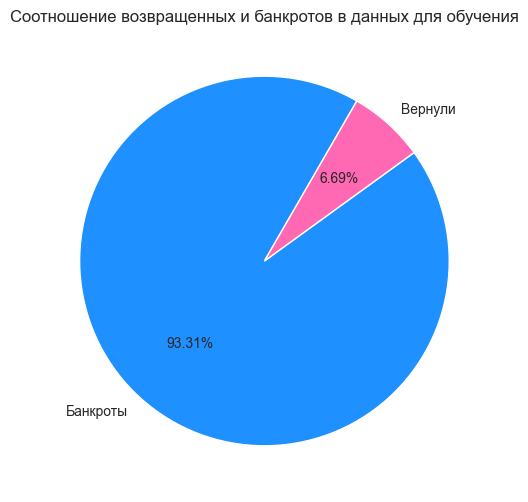

In [ ]:
plt.figure(figsize=(7,6))
rev_counts = base_train.groupby('SeriousDlqin2yrs')['SeriousDlqin2yrs'].count()

plt.pie(rev_counts, colors=['dodgerblue', 'hotpink'],
       autopct='%1.2f%%', labels=['Банкроты', 'Вернули'], startangle=60)
plt.title('Соотношение возвращенных и банкротов в данных для обучения', fontsize='large')

plt.savefig('rev_pie.png')  # Сохранение картинки
plt.show()

#### *Из этого графика видно что имеется большая разница (перевес) по данным возврата и невозврата. Из-за такой разницы модель не может быть точно обучена, а следовательно не может выдать качественный результат для определения заёмщика.*

### Сделав сводный график по всей таблице, мы лишь убеждаемся в том что данные необходимо дополнять.

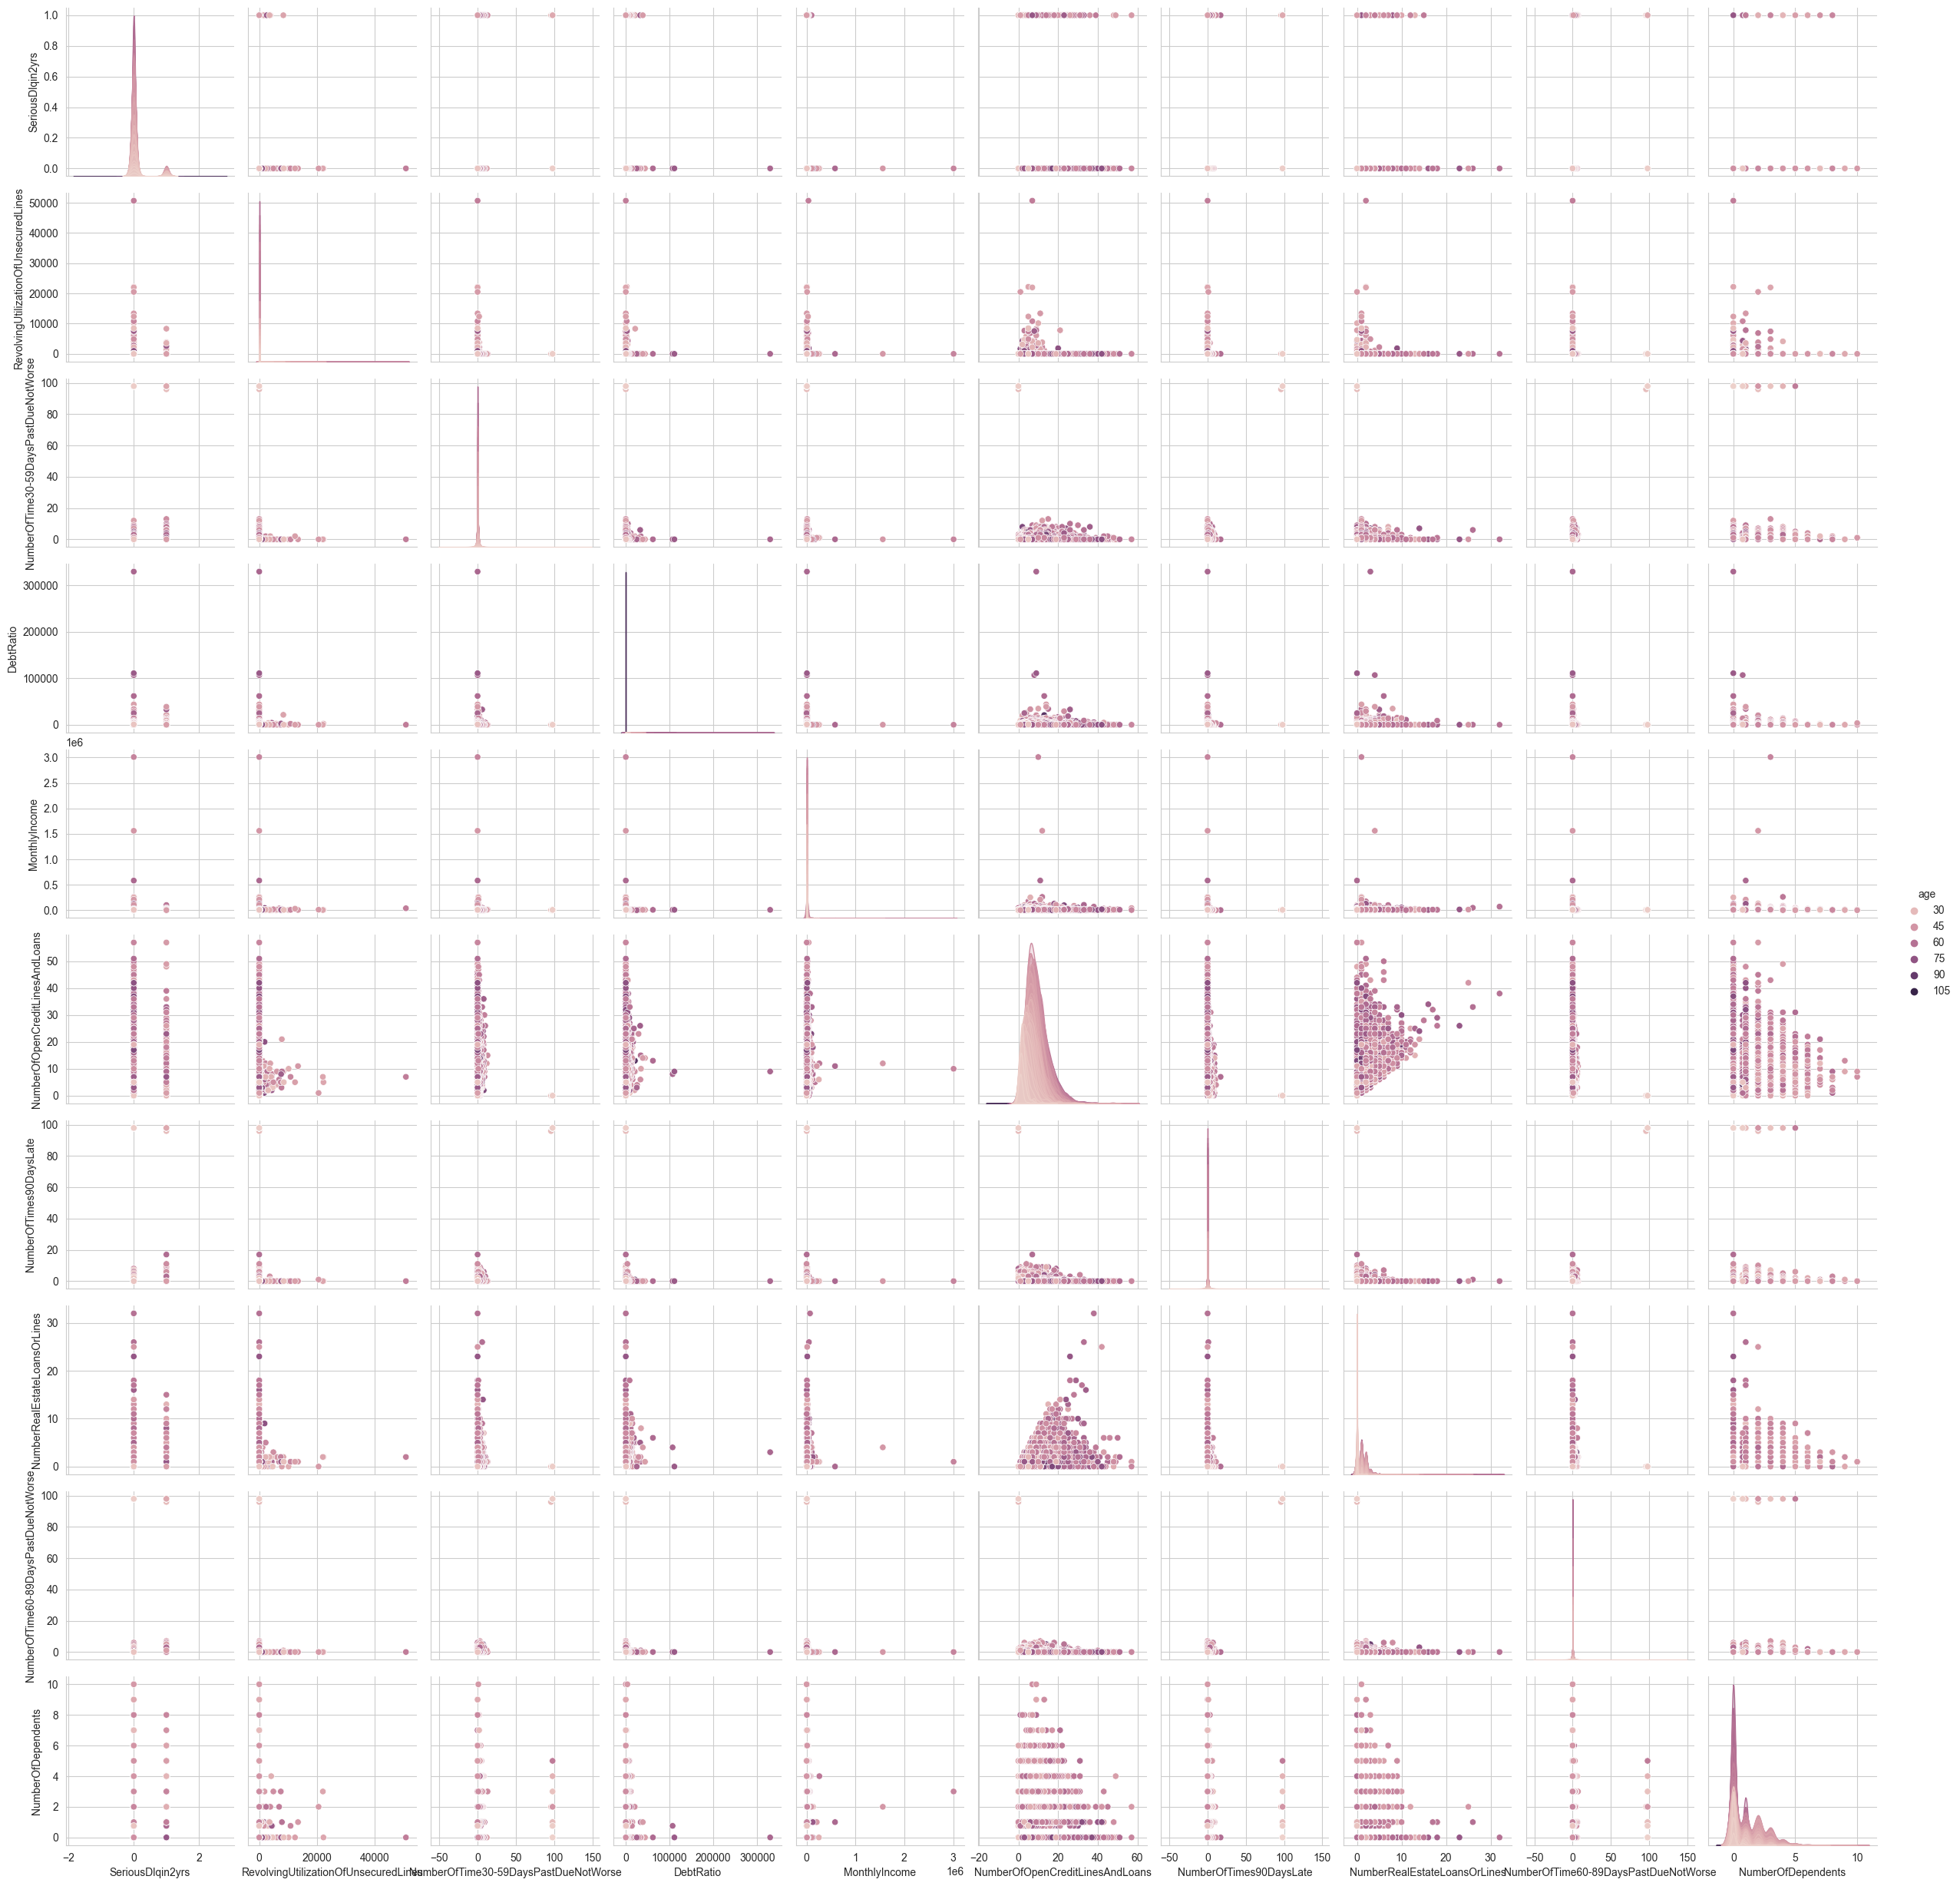

In [ ]:
sns.pairplot(data=base_train, hue= 'age')

In [ ]:
# выборка строк из таблицы (каждая 500 строка)
base_train[:5000:500]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.250476,65,0,1963.000000,6642.232222,5,0,2,0,0.00000
500,0,0.638872,50,0,0.172965,5000.000000,7,1,0,0,3.00000
1000,0,0.195780,28,0,0.026150,2217.000000,1,1,0,0,0.00000
1500,0,0.052872,53,0,0.084728,15000.000000,21,0,0,0,0.00000
2000,0,0.037342,66,0,0.429325,11000.000000,7,0,1,0,0.00000
2500,0,0.038756,61,0,0.008869,7666.000000,13,0,0,0,0.00000
3000,0,0.042718,86,0,0.102966,3000.000000,4,0,0,0,0.00000
3500,1,0.999674,50,1,0.124540,4343.000000,4,1,0,2,0.00000
4000,0,0.015645,77,0,24.000000,6642.232222,5,0,0,0,0.75618
4500,1,0.926592,37,0,1.200588,1360.000000,5,0,0,0,2.00000


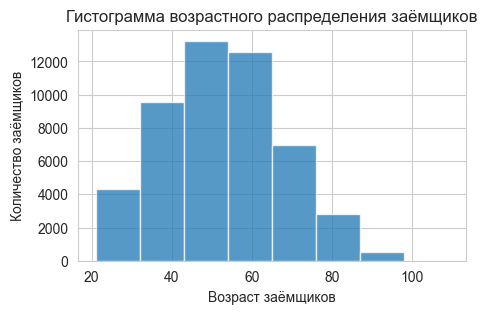

In [ ]:
base_train.age.plot.hist(figsize=(5,3), bins=8, alpha=0.75) 
# alpha=75 прозрачность окрашеных данных

plt.title('Гистограмма возрастного распределения заёмщиков') # заголовок гистограммы
plt.ylabel('Количество заёмщиков') # y-метка
plt.xlabel('Возраст заёмщиков') # x-метка

plt.show()

In [ ]:
base_train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [ ]:
a= base_train['NumberOfTime30-59DaysPastDueNotWorse']
b= base_train['NumberOfTime60-89DaysPastDueNotWorse']
c= base_train['NumberOfTimes90DaysLate']
d= base_train['SeriousDlqin2yrs']
a.sum(),b.sum(),c.sum(), d.sum()

(21411, 12302, 13496, 3343)

In [ ]:
plt.figure(figsize=(15,5))

m_counts = [len(df[(df['sex']=='m') & (df['orientation_code']==i)]) for i in range(-1,2)]
f_counts = [len(df[(df['sex']=='f') & (df['orientation_code']==i)]) for i in range(-1,2)]
orientation_counts = [len(df[df['orientation_code']==i]) for i in range(-1,2)]


plt.suptitle('Sexuality Listed', fontsize='x-large')

plt.subplot(131)
plt.pie(m_counts, colors=['mediumpurple', 'white', 'seagreen'], autopct='%1.1f%%',
       labels=orientation_key)
plt.title('Male', fontsize='large')

plt.subplot(132)
plt.pie(orientation_counts, colors=colors_trans_gq, autopct='%1.1f%%',
       labels=orientation_key)
plt.title('Overall', fontsize='large')

plt.subplot(133)
plt.pie(f_counts, colors=['mediumpurple', 'white', 'seagreen'], autopct='%1.1f%%',
       labels=orientation_key)
plt.title('Female', fontsize='large')

plt.savefig('sexuality_gender.png')
plt.show()

<AxesSubplot: >

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


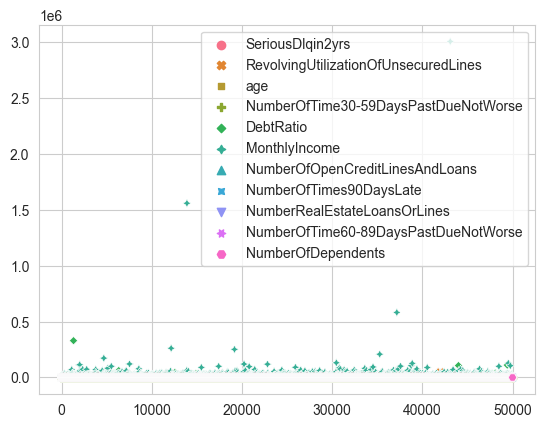

In [ ]:
sns.scatterplot(data=base_train)

# <a name="6">7. Выводы</a>

### **Как понять, хорошо работает модель или нет?**

Из значения точности мы никак не можем понять, сколько меток каждого класса правильно предсказала модель. В нашей задаче мало значений с классом 1 (дефолт), но много 0 (возврат кредита). Может быть такая ситуация, когда модель очень хорошо научилась выделять характеристики большого класса, в нашем случае 0, но совсем не умеет выделять характеристики маленького класса. А часто именно последние в большей степени интересуют аналитиков. 

Самый простой способ проверить - это сравнить значения точности для наших моделей с точностью для константного классификатора, модели, которая всегда бы предсказывала больший класс, в нашем случае 0. 
Для этого можно в функцию **`accuracy_score()`** в качестве второго аргумента передать массив нулей такого же размера, как и *test_values*. Это делается с помощью функции **`zeros_like()`** из библиотеки numpy, у которой один аргумент - *test_values*, массив с размером которого будет создан массив нулей. 

Другой способ оценивать качество работы классификатора - использовать таблицу сопряженности. 

**Таблица сопряжённости** (матрица неточности, или `confusion matrix`) содержит сводные показатели качества работы классификатора. **Строки** этой таблицы соответствуют **фактическим классам** тестового набора, а **столбцы** - **предсказанным** классификатором меткам.

Импортируем функцию для построения таблицы сопряженности из библиотеки **`sklearn`**.

Таблица содержит четыре сводных показателя, каждый из которых отражает количество объектов в одной и четырех
категорий: 
* **истинно позитивный** (*True positive*, **TP**) -- объект
класса `1` был верно помечен меткой `1`;
* **ложно позитивный** (*False positive*, **FP**) -- объект
фактически принадлежит классу `0`, но помечен меткой `1`;
* **истинно отрицательный** (*True negative*, **TN**) -- классификатор
верно определил, что объект класса `0` принадлежит классу `0`;
* **ложно отрицательный** (*False negative*, **FN**) -- классификатор
пометил объект меткой `0`, однако на самом деле объект принадлежит классу `1`.


Замечание: ошибки False positive часто называют **ложной тревогой**, а False negative - **пропуском цели**. 

# Финальный вывод

### Достаточно получено данных для того что бы сделать предсказательные модели в которых более 92% это **True Negativ** *(истино отрицательные)* значения, но эти модели можно использовать только для наиболее вероятного определения заёмщика который не вернет займ. Для честного предсказания результата необходимо гораздо больше данных о клиентах возвратных займов, как количественное так и информативное. 

**<center>Список литературы</center>**

1. Андерсон, К, Аналитическая культура: от сбора данных до бизнес-результатов / Карл Андерсон. - Москва : Манн, Иванов и Фербер, 2017. - 324 с.
2. Бенгфорт Бенджамин, Билбро Ребекка, Охеда Тони, Прикладной анализ текстовых данных на Python. Машинное обучение и создание приложений обработки естественного языка. — СПб.: Питер, 2019. 
3. Библиотека Matplotlib. - devpractice.ru. 2019. - 100 с. 
4. Плас Дж. Вандер, Python для сложных задач: наука о данных и машинное обучение. — СПб.: Питер, 2018.
5. Рашка С., Рашка С. Р28 Python и машинное обучение / пер. с англ. А. В. Логунова. - М.: ДМК Пресс, 2017.  
6.  https://proglib.io/p/vasha-povsednevnaya-shpargalka-po-matplotlib-2021-02-04 